In [6]:
import sys
sys.path
sys.path.append('../../')

from src.visualization import visualize
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import cv2
import glob

from skimage import io

import PIL
# import logging 

out_train_data_dir = '../../data/processed/Cropped_same_name/train'
out_val_data_dir = '../../data/processed/Cropped_same_name/val'
out_test_data_dir = '../../data/processed/Cropped_same_name/test'

bal_train_data_dir = '../../data/processed/Balanced_80/train'
bal_val_data_dir = 'D:/Users/juanp/Documents/NeuralNetworks/final-project-landandbuildingsatimg-ccny/data/processed/Balanced_80/val'
bal_test_data_dir = 'D:/Users/juanp/Documents/NeuralNetworks/final-project-landandbuildingsatimg-ccny/data/processed/Balanced_80/test'


## Read Images Paths

In [2]:
reading_image = glob.glob(f"{out_train_data_dir}/Images/*.png")
reading_mask = glob.glob(f"{out_train_data_dir}/Masks/*.png")

In [3]:
labels = pd.read_csv(f'{out_test_data_dir}/../class_dict.csv')['name'].values
col_dict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 
           4: 'yellow', 5: 'purple', 6: 'grey', }
pd.read_csv(f'{out_test_data_dir}/../class_dict.csv')['name']

0             unknown
1          urban_land
2    agriculture_land
3           rangeland
4         forest_land
5               water
6         barren_land
Name: name, dtype: object

In [4]:
img = np.asarray(PIL.Image.open(reading_image[200], 'r'))
msk = np.asarray(PIL.Image.open(reading_mask[200], 'r'))

In [5]:
msk[msk == 4].shape, msk[msk == 3].shape

((0,), (6028,))

In [6]:
reading_mask[0][126:]

'Batch_0_Image_0_Tile_0.png'

## Plot Images

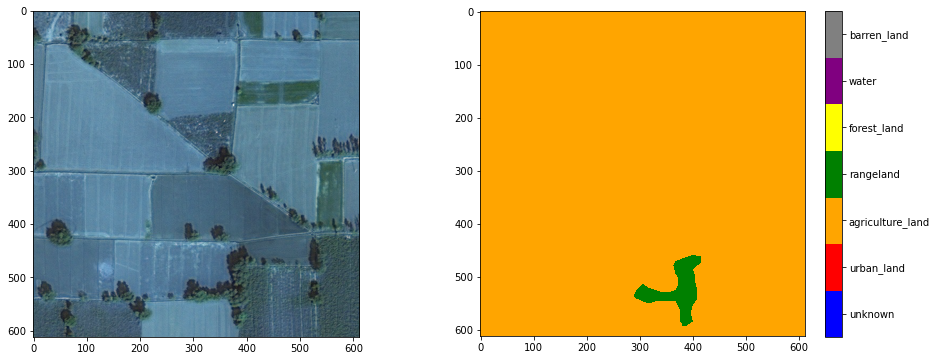

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[1] = visualize.plot_label(msk, labels,col_dict, axes[1], fig, colorbar = True)
axes[0].imshow(img)

In [8]:
hist, bins = np.histogram(msk, bins=[0, 1, 2, 3, 4, 5, 6, 7])

In [9]:
hist[2]/hist.sum()

0.9839057627408262

# Balancing The Dataset

In [3]:
bal_train_data_dir = 'D:/Users/juanp/Documents/NeuralNetworks/final-project-landandbuildingsatimg-ccny/data/processed/Balanced_80/train'
bal_val_data_dir = 'D:/Users/juanp/Documents/NeuralNetworks/final-project-landandbuildingsatimg-ccny/data/processed/Balanced_80/val'
bal_test_data_dir = 'D:/Users/juanp/Documents/NeuralNetworks/final-project-landandbuildingsatimg-ccny/data/processed/Balanced_80/test'

reading_image = glob.glob(f"{out_test_data_dir}/Images/*.png")
reading_mask = glob.glob(f"{out_test_data_dir}/Masks/*.png")

for i in range(len(reading_image)):
#     balance = np.zeros(([len(reading_image)]))
    img = np.asarray(PIL.Image.open(reading_image[i], 'r'))
    msk = np.asarray(PIL.Image.open(reading_mask[i], 'r'))

    hist, bins = np.histogram(msk, bins=[0, 1, 2, 3, 4, 5, 6, 7])
    agri_per = hist[2]/hist.sum()
    
    if agri_per < 0.8:
        cv2.imwrite(f'{bal_test_data_dir}/Images/{reading_image[i][127:]}', img)
        cv2.imwrite(f'{bal_test_data_dir}/Masks/{reading_mask[i][126:]}', msk)
#         balance[i] = 1
#     else:
#         balance[i] = 0



TypeError: Expected Ptr<cv::UMat> for argument 'img'

In [13]:
reading_image[500][127:-4]

'Batch_10_Image_24_Tile_10'

## Create Sample Weights

In [16]:
bal_train_data_dir = 'D:/Users/juanp/Documents/NeuralNetworks/final-project-landandbuildingsatimg-ccny/data/processed/Balanced_80/train'

reading_image = glob.glob(f"{out_train_data_dir}/Images/*.png")
reading_mask = glob.glob(f"{out_train_data_dir}/Masks/*.png")

reading_image_n = len(reading_image)
# reading_image_n = 100

weight = np.zeros(([reading_image_n]))

for i in range(reading_image_n):
    img = np.asarray(PIL.Image.open(reading_image[i], 'r'))
    msk = np.asarray(PIL.Image.open(reading_mask[i], 'r'))

    hist, bins = np.histogram(msk, bins=[0, 1, 2, 3, 4, 5, 6, 7])
    agri_per = hist[2]/hist.sum()
    
    if agri_per < 0.8:
        np.save(f'{bal_train_data_dir}/Sample_Weights/{reading_image[i][127:-4]}.npy', 1)

    else:
        np.save(f'{bal_train_data_dir}/Sample_Weights/{reading_image[i][127:-4]}.npy', 0.6)


In [31]:
np.array([np.load(f'{bal_train_data_dir}/Sample_Weights/{reading_image[200][127:-4]}.npy')]).shape

(1,)

In [29]:
np.array([1]).shape

(1,)

In [157]:
np.histogram(balance)

(array([8220,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [82]:
reading_image[i][127:]

'Batch_10_Image_24_Tile_10.png'

In [160]:
reading_image2 = glob.glob(f"{bal_val_data_dir}/Images/*.png")
reading_mask2 = glob.glob(f"{bal_val_data_dir}/Masks/*.png")

img2 = np.asarray(PIL.Image.open(reading_image2[20], 'r'))
msk2 = np.asarray(PIL.Image.open(reading_mask2[20], 'r'))

In [161]:
len(reading_image), len(reading_image2)

(2570, 1388)

## Plot Images

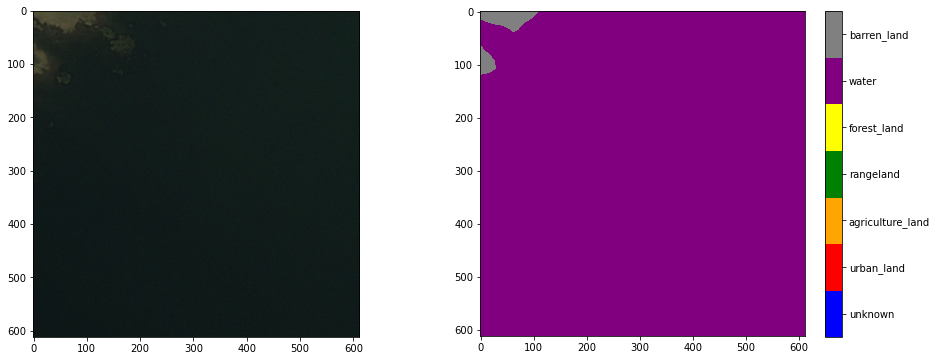

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[1] = visualize.plot_label(msk2, labels,col_dict, axes[1], fig, colorbar = True)
axes[0].imshow(img2)

In [7]:
def plot_img_histogram(img_path):
    image = np.zeros(([len(img_path), 612, 612]))
    for i in range(len(img_path)):
        im = np.asarray(PIL.Image.open(img_path[i], 'r'))
        image[i,:,:] = im
    fig, ax = plt.subplots()
    ax.hist(image.ravel(), bins = 7, color = 'Blue', alpha = 0.5)
#     plt.hist(image[:, :].ravel(), bins = 7, color = 'Green', alpha = 0.5)
#     plt.hist(image[:, :].ravel(), bins = 7, color = 'Blue', alpha = 0.5)
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Mask Histogram')
    plt.show()
    
    hist, bins = np.histogram(image.ravel(), bins=[0, 1, 2, 3, 4, 5, 6, 7])
    return fig, ax, hist, bins

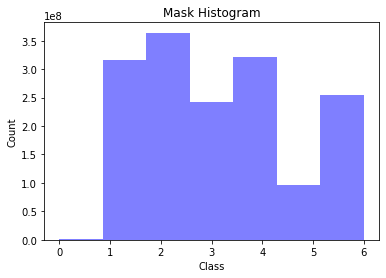


Time Taken for testing: 0:02:08.309484


array([  1541531, 315787121, 364032659, 242471608, 320682435,  95860255,
       254058199])

In [13]:
#     Convert RGB mask to categorical array.
#     urban_land         [0 ,255 ,255]    --> 1
#     agriculture_land   [255 ,255 ,0]    --> 2   
#     rangeland          [255 ,0 ,255]    --> 3
#     forest_land        [0 ,255 ,0]      --> 4
#     water              [0 ,0 ,255]      --> 5
#     barren_land        [255 ,255 ,255]  --> 6
#     unknown            [0 ,0 ,0]        --> 0

from datetime import datetime
start = datetime.now()
 
f = glob.glob(bal_train_data_dir + '/Masks/*.png')
fig , ax, hist, bins = plot_img_histogram(f)
# fig.savefig('Histogram', dpi = 300)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))
hist

In [14]:
fig.savefig('Histogram', dpi = 300)
